## EDA Case study on Bank Application Data
__Authors__
* S S B Phani Pradeep Miriyala
* Chandra Sekhar Reddy Kandimalla

In [1]:
# UPGRAD EDA Case Study 
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

__Data Files__
* application_data.csv : *Consists of current application data details*
* previous_application.csv : *Consists of data about customer's previous application history*
* column_description.csv : *Consists of desccriptions about each column in application data and previous application data files. This file will not be considered for any analysis and is an auxiliary information file*

# Data Exploration on current application data
### Step 1 : Start by importing the application data file
__Basic exploration of "application data" file__
* Import data from application data file
* Check for data properties

In [2]:
# Load the data fully.
data_file="application_data.csv"
app_data = pd.read_csv(data_file)

### Step 2 : Check the structure of the data

In [3]:
# Let us identify data structure properties
print("Data shape :", app_data.shape)
app_data.info()

Data shape : (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


***
The data has over 3 Lakh rows and 122 columns. Now let us move on to data quality check.
***
###  Step 3: Data Quality Check and missing values
#### Step 3. a : finding the percentage of missing values for all the columns

In [4]:
# Get null counts in each column and sort them by columns having highest percentage of null values.
null_percentage=(app_data.isnull().sum()*100/app_data.shape[0]).to_frame('Null_Percentage')
null_percentage.sort_values(by='Null_Percentage',ascending=False,inplace=True)
# Print only columns where there are some nulls.
# Also adjust the maximum rows displayed temporarily and reset after all columns are displayed.
def_rows = pd.options.display.max_rows
pd.options.display.max_rows = 100
# Let us get list of columns where Null value percentages are above 40%.
cols_to_remove = null_percentage[null_percentage.Null_Percentage>40].index
print(null_percentage[null_percentage.Null_Percentage>40])
pd.options.display.max_rows = def_rows

                              Null_Percentage
COMMONAREA_MEDI                     69.872297
COMMONAREA_AVG                      69.872297
COMMONAREA_MODE                     69.872297
NONLIVINGAPARTMENTS_MODE            69.432963
NONLIVINGAPARTMENTS_AVG             69.432963
NONLIVINGAPARTMENTS_MEDI            69.432963
FONDKAPREMONT_MODE                  68.386172
LIVINGAPARTMENTS_MODE               68.354953
LIVINGAPARTMENTS_AVG                68.354953
LIVINGAPARTMENTS_MEDI               68.354953
FLOORSMIN_AVG                       67.848630
FLOORSMIN_MODE                      67.848630
FLOORSMIN_MEDI                      67.848630
YEARS_BUILD_MEDI                    66.497784
YEARS_BUILD_MODE                    66.497784
YEARS_BUILD_AVG                     66.497784
OWN_CAR_AGE                         65.990810
LANDAREA_MEDI                       59.376738
LANDAREA_MODE                       59.376738
LANDAREA_AVG                        59.376738
BASEMENTAREA_MEDI                 

#### Step 3.b: Remove the columns where data is missing for above 45% of whole set.

In [5]:
# Chosing threshold as 40% to remove
app_data.drop(cols_to_remove,axis=1,inplace=True)

In [6]:
# Recheck data frame information.
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [7]:
#look at number of unique catergories in columns
pd.options.display.max_rows=80
print(app_data.nunique().sort_values())
pd.options.display.max_rows=def_rows

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

#### Step 3.c : Check for values to impute for columns that have less share (but not too less) of missing values.
We will consider columns that have more than 10% of missing values.

In [8]:
# We need to recalculate null percentages as the previously calculated array is not useful due to dropping some columns
null_percentage=(app_data.isnull().sum()*100/app_data.shape[0]).to_frame('Null_Percentage')
null_percentage.sort_values(by='Null_Percentage',ascending=False,inplace=True)
cols_to_impute = null_percentage[null_percentage.Null_Percentage>10].index
print(null_percentage[null_percentage.Null_Percentage>10])

                            Null_Percentage
OCCUPATION_TYPE                   31.345545
EXT_SOURCE_3                      19.825307
AMT_REQ_CREDIT_BUREAU_YEAR        13.501631
AMT_REQ_CREDIT_BUREAU_QRT         13.501631
AMT_REQ_CREDIT_BUREAU_MON         13.501631
AMT_REQ_CREDIT_BUREAU_WEEK        13.501631
AMT_REQ_CREDIT_BUREAU_DAY         13.501631
AMT_REQ_CREDIT_BUREAU_HOUR        13.501631


In [9]:
# Let us look at data types and nature of data for all these columns.
app_data[cols_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
OCCUPATION_TYPE               211120 non-null object
EXT_SOURCE_3                  246546 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64
dtypes: float64(7), object(1)
memory usage: 18.8+ MB


In [10]:
# Except OCCUPATION_TYPE all other columns are numeric in nature.

In [11]:
# First column, OCCUPATION_TYPE has 30% missing values.
# It can be noted that occupation type is categorical type. We can confirm this by looking at all unique values of this column.
app_data.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

*It can be seen that, there are no repeated values. Hence there is no need to __correct__ any values.
<br/>For missing values, we will create a new category named **No Occupation**.*

In [12]:
# Imputing the null values with No Occupation value
app_data.loc[app_data.OCCUPATION_TYPE.isnull(),"OCCUPATION_TYPE"]="No Occupation"
app_data.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers',
       'No Occupation', 'Drivers', 'Sales staff', 'Cleaning staff',
       'Cooking staff', 'Private service staff', 'Medicine staff',
       'Security staff', 'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

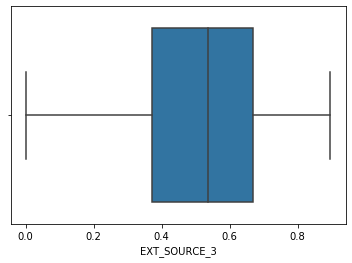

Missing values :  60965
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


In [13]:
# Now look at EXT_SOURCE_3 column
# The data type of this column is float type.
# To understood which value is suitable for imputing, let us look at box plot and see how data is distributed.
def analyze_data(data,col_name,xscale="linear"):
    sns.boxplot(data[col_name])
    plt.xscale(xscale)
    plt.show()    
    print("Missing values : ",data[col_name].isnull().sum())
    print(data[col_name].describe())
analyze_data(app_data,"EXT_SOURCE_3")

##### As it can be seen, data is very nicely distrubuted with median (0.53) and mean (0.51) values very close.
* EXT_SOURCE_3 is described as "Normalized score from external data source"
* Although data is nicely distributed, we should not impute it with neither mean or median. The score should be imputed with zero.

In [14]:
# Imputing the null values with 0
app_data.loc[app_data.EXT_SOURCE_3.isnull(),"EXT_SOURCE_3"]=0

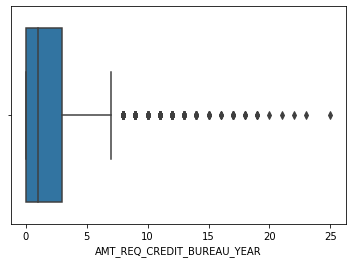

Missing values :  41519
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


In [15]:
# Now let us look at AMT_REQ_CREDIT_BUREAU_YEAR column
analyze_data(app_data,"AMT_REQ_CREDIT_BUREAU_YEAR")

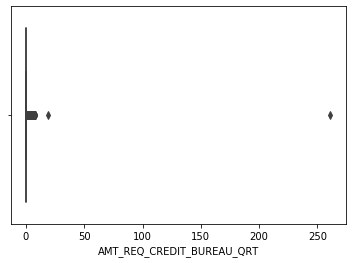

Missing values :  41519
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [16]:
# Now let us look at AMT_REQ_CREDIT_BUREAU_QRT column
analyze_data(app_data,"AMT_REQ_CREDIT_BUREAU_QRT")

##### From the plot, we can observe that this column has several outliers. 
*This column is described as "Number of enquiries to Credit Bureau about the client 3 month (excluding last 1 month before application)".*
<br/>Since it is absolutely number of enquiries, we can not impute the missing values with either mean or median.
<br/>Assume that if this value is missing, it could mean there are no record of entries which implies the missing values can be imputed with **0**.
<br/>Further, this column data type has to be fixed. This is an integer column stored as floating type.

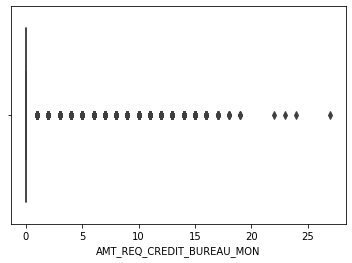

Missing values :  41519
count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


In [17]:
# Now let us look at AMT_REQ_CREDIT_BUREAU_MON column
analyze_data(app_data,"AMT_REQ_CREDIT_BUREAU_MON")

##### From the plot, we can observe that this column has several outliers. 
*This column is described as "Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)".*
<br/>Since it is absolutely number of enquiries, we can not impute the missing values with either mean or median.
<br/>Assume that if this value is missing, it could mean there are no record of entries which implies the missing values can be imputed with **0**.
<br/>Further, this column data type has to be fixed. This is an integer column stored as floating type.

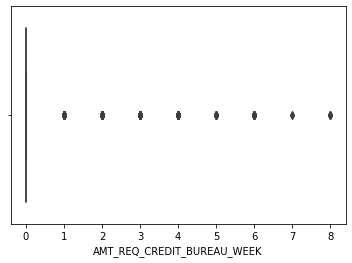

Missing values :  41519
count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


In [18]:
# Now let us look at AMT_REQ_CREDIT_BUREAU_WEEK column
analyze_data(app_data,"AMT_REQ_CREDIT_BUREAU_WEEK")

##### From the plot, we can observe that this column has several outliers. 
*This column is described as "Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)".*
<br/>Since it is absolutely number of enquiries, we can not impute the missing values with either mean or median.
<br/>Assume that if this value is missing, it could mean there are no record of entries which implies the missing values can be imputed with **0**.
<br/>Further, this column data type has to be fixed. This is an integer column stored as floating type.

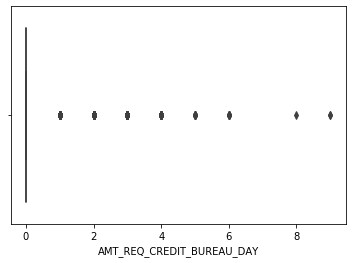

Missing values :  41519
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [19]:
# Now let us look at AMT_REQ_CREDIT_BUREAU_DAY column
analyze_data(app_data,"AMT_REQ_CREDIT_BUREAU_DAY")

##### From the plot, we can observe that this column has several outliers. 
*This column is described as "Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)".*
<br/>Since it is absolutely number of enquiries, we can not impute the missing values with either mean or median.
<br/>Assume that if this value is missing, it could mean there are no record of entries which implies the missing values can be imputed with **0**.
<br/>Further, this column data type has to be fixed. This is an integer column stored as floating type.

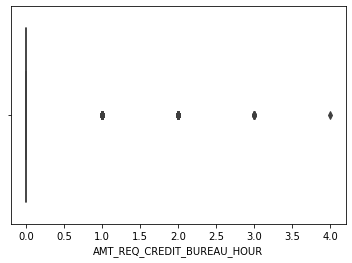

Missing values :  41519
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


In [20]:
# Now let us look at AMT_REQ_CREDIT_BUREAU_HOUR column
analyze_data(app_data,"AMT_REQ_CREDIT_BUREAU_HOUR")

##### From the plot, we can observe that this column has several outliers. 
*This column is described as "Number of enquiries to Credit Bureau about the client one hour before application".*
<br/>Since it is absolutely number of enquiries, we can not impute the missing values with either mean or median.
<br/>Assume that if this value is missing, it could mean there are no record of entries which implies the missing values can be imputed with **0**.
<br/>Further, this column data type has to be fixed. This is an integer column stored as floating type.

***
#### Data type checking

In [21]:
# For checking data types, we will focus on a smaller sets of columns at a time to minimize complexity in analyzing types.
# First let us look at all columns that are associated with "FLAGS".
# Since these are "FLAG" columns, we expect the column to be boolean (or integer) in nature reflecting True or False.
flag_cols = [x for x in app_data.columns if x.startswith("FLAG_")]
app_data[flag_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
FLAG_OWN_CAR        307511 non-null object
FLAG_OWN_REALTY     307511 non-null object
FLAG_MOBIL          307511 non-null int64
FLAG_EMP_PHONE      307511 non-null int64
FLAG_WORK_PHONE     307511 non-null int64
FLAG_CONT_MOBILE    307511 non-null int64
FLAG_PHONE          307511 non-null int64
FLAG_EMAIL          307511 non-null int64
FLAG_DOCUMENT_2     307511 non-null int64
FLAG_DOCUMENT_3     307511 non-null int64
FLAG_DOCUMENT_4     307511 non-null int64
FLAG_DOCUMENT_5     307511 non-null int64
FLAG_DOCUMENT_6     307511 non-null int64
FLAG_DOCUMENT_7     307511 non-null int64
FLAG_DOCUMENT_8     307511 non-null int64
FLAG_DOCUMENT_9     307511 non-null int64
FLAG_DOCUMENT_10    307511 non-null int64
FLAG_DOCUMENT_11    307511 non-null int64
FLAG_DOCUMENT_12    307511 non-null int64
FLAG_DOCUMENT_13    307511 non-null int64
FLAG_DOCUMENT_14    307511 non-null int64
FLAG_

In [22]:
# By scanning at data types, there are two types that needs data type correction.
# The columns are FLAG_OWN_CAR, FLAG_OWN_REALTY
# Let us look at both columns to understand nature of data for conversion.
print(app_data.FLAG_OWN_CAR.unique())
print(app_data.FLAG_OWN_REALTY.unique())

['N' 'Y']
['Y' 'N']


In [23]:
# The values are simply 'Y', 'N'. Replace them with 1 (='Y'), 0(='N'). There are no missing values.
app_data.FLAG_OWN_CAR=app_data.FLAG_OWN_CAR.apply(lambda x:0 if(x=='N') else 1)
app_data.FLAG_OWN_REALTY=app_data.FLAG_OWN_REALTY.apply(lambda x:0 if(x=='N') else 1)

In [24]:
#checking the data type again to confirm data type conversion is commeneced or not
app_data[flag_cols].columns.to_series().groupby(app_data[flag_cols].dtypes).groups

{dtype('int64'): Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
        'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
        'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
        'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
        'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
        'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
       dtype='object')}

### Step 3.e : For numerical columns check for outliers and report them

In [25]:
# Now let us look at columns related to "DAYS".
day_cols = [x for x in app_data.columns if x.startswith("DAYS_")]
app_data[day_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
DAYS_BIRTH                307511 non-null int64
DAYS_EMPLOYED             307511 non-null int64
DAYS_REGISTRATION         307511 non-null float64
DAYS_ID_PUBLISH           307511 non-null int64
DAYS_LAST_PHONE_CHANGE    307510 non-null float64
dtypes: float64(2), int64(3)
memory usage: 11.7 MB


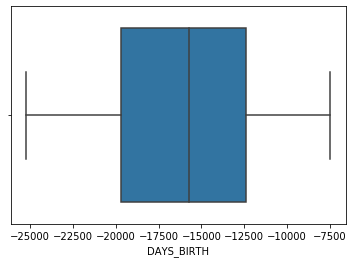

Missing values :  0
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


In [26]:
# Let us look at values of DAYS_BIRTH.
analyze_data(app_data,"DAYS_BIRTH")

In [27]:
# The column is described as "Clients age in days at time of application".
# Looking at data, the entire data ranges between (-25229, -7489). 
# Thus, this column needs two corrections.
# a) Data type is floating value. This must be changed to integer.
# b) Entire data is in negative side. Replace data with positive values.
app_data.DAYS_BIRTH=app_data.DAYS_BIRTH.apply(lambda x:int(abs(x)))

In [28]:
# Let us look at values of DAYS_BIRTH after correctoin
app_data.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

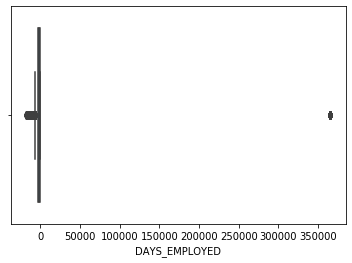

Missing values :  0
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [29]:
# Let us look at values of DAYS_EMPLOYED.
analyze_data(app_data,"DAYS_EMPLOYED")

In [30]:
# As assumed, the high value is used for specific purpose to denote missing values.
# Now, let us re-look at data excluding outlier.
app_data.DAYS_EMPLOYED[app_data.DAYS_EMPLOYED!=max(app_data.DAYS_EMPLOYED)].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [31]:
# When we remove the max value of 100 years, the remaining data fits in range of (-17912,0).
# Thus, this column needs two corrections.
# a) Data type is floating value. This must be changed to integer.
# b) Partial data is in negative side. Replace partial data with positive values. Leave outliers as it is.
app_data.DAYS_EMPLOYED=app_data.DAYS_EMPLOYED.apply(lambda x:int(abs(x)) if (x<0) else int(x))

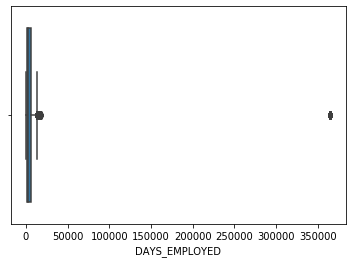

Missing values :  0
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [32]:
# Now let us relook at box plot and stats.
analyze_data(app_data,"DAYS_EMPLOYED")

In [33]:
# The column is described as "How many days before the application did client change his registration".
# Looking at data, the entire data ranges between (-24672, 0). 
# Thus, this column needs two corrections.
# a) Data type is floating value. This must be changed to integer.
# b) Entire data is in negative side. Replace data with positive values.
app_data.DAYS_REGISTRATION=app_data.DAYS_REGISTRATION.apply(lambda x:int(abs(x)))

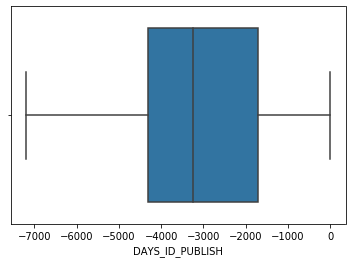

Missing values :  0
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


In [34]:
# Let us look at column DAYS_ID_PUBLISH
analyze_data(app_data,"DAYS_ID_PUBLISH")

In [35]:
# The column is described as "How many days before the application did client change the identity document with which he applied for the loan".
# Looking at data, the entire data ranges between (-7197, 0). 
# Thus, this column needs two corrections.
# a) Data type is floating value. This must be changed to integer.
# b) Entire data is in negative side. Replace data with positive values.
app_data.DAYS_ID_PUBLISH=app_data.DAYS_ID_PUBLISH.apply(lambda x:int(abs(x)))

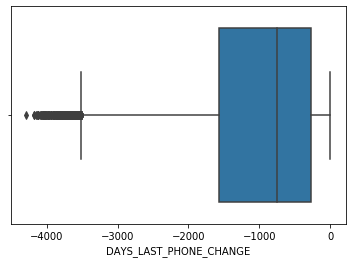

Missing values :  1
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


In [36]:
# Let us look at DAYS_LAST_PHONE_CHANGE
analyze_data(app_data,"DAYS_LAST_PHONE_CHANGE")

In [37]:
# The column is described as "How many days before application did client change phone".
# Looking at data, the entire data ranges between (-4292, 0). 
# Thus, this column needs two corrections.
# a) Data type is floating value. This must be changed to integer.
# b) Entire data is in negative side. Replace data with positive values.
# c) There is 1 missing value in column. We can't directly convert NAN to integer. 
#    Since, NAN data type is float. We also need to impute this missing value.
#    By looking at data definition, it may be safe to assume that a missing value can be imputed by zero rather 
#          than very high value which would give a wrong meaning that phone is never changed.
app_data.DAYS_LAST_PHONE_CHANGE=app_data.DAYS_LAST_PHONE_CHANGE.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)

In [38]:
# Above, we already have identified need to convert columns "AMT_*" from floating to integers 
#  and we decided that missing values to be imputed with "0"
app_data.AMT_REQ_CREDIT_BUREAU_HOUR=app_data.AMT_REQ_CREDIT_BUREAU_HOUR.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)
app_data.AMT_REQ_CREDIT_BUREAU_DAY=app_data.AMT_REQ_CREDIT_BUREAU_DAY.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)
app_data.AMT_REQ_CREDIT_BUREAU_WEEK=app_data.AMT_REQ_CREDIT_BUREAU_WEEK.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)
app_data.AMT_REQ_CREDIT_BUREAU_MON=app_data.AMT_REQ_CREDIT_BUREAU_MON.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)
app_data.AMT_REQ_CREDIT_BUREAU_QRT=app_data.AMT_REQ_CREDIT_BUREAU_QRT.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)
app_data.AMT_REQ_CREDIT_BUREAU_YEAR=app_data.AMT_REQ_CREDIT_BUREAU_YEAR.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)

In [39]:
# Let us look at column types one more time
app_data.columns.to_series().groupby(app_data.dtypes).groups

{dtype('int64'): Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
        'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
        'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
        'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
        'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
        'FLAG_DOC

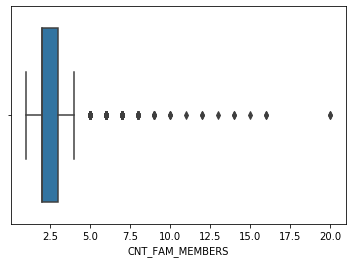

Missing values :  2
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [40]:
# Let us look at CNT_FAM_MEMBERS
analyze_data(app_data,"CNT_FAM_MEMBERS")

In [41]:
# Column CNT_FAM_MEMBERS is described as "How many family members does client have".
# This column needs below corrections
# a) Data type is floating value. This must be changed to integer.
# b) There are 2 missing values in column. We can't directly convert NAN to integer. 
#    Since, NAN data type is float. We also need to impute this missing value.
#    By looking at data definition, it may be safe to assume that a missing value can be imputed by zero meaning no record of family.
app_data.CNT_FAM_MEMBERS=app_data.CNT_FAM_MEMBERS.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)

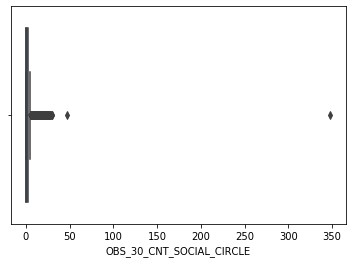

Missing values :  1021
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [42]:
# The columns "OBS_*", "DEF_*" are related to number of observations. They are stored as floating values. We need to change.
# let us look at column OBS_30_CNT_SOCIAL_CIRCLE
analyze_data(app_data,"OBS_30_CNT_SOCIAL_CIRCLE")

In [43]:
# The column OBS_30_CNT_SOCIAL_CIRCLE is described as "How many observation of client's social surroundings with observable 30 DPD (days past due) default"
# This column needs below corrections
# a) Data type is floating value. This must be changed to integer.
# b) There are 1021 missing values in column. We can't directly convert NAN to integer. 
#    Since, NAN data type is float. We also need to impute this missing value.
#    By looking at data definition, it may be safe to assume that a missing value can be imputed by zero meaning no record of observations in social surroundings.
app_data.OBS_30_CNT_SOCIAL_CIRCLE=app_data.OBS_30_CNT_SOCIAL_CIRCLE.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)

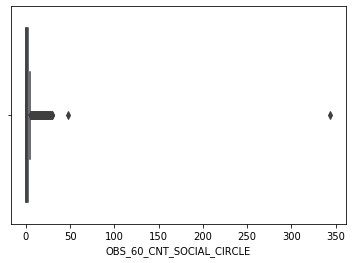

Missing values :  1021
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [44]:
# We can apply similar principle to column OBS_60_CNT_SOCIAL_CIRCLE as well.
analyze_data(app_data,"OBS_60_CNT_SOCIAL_CIRCLE")

In [45]:
#imputing the values with 0
app_data.OBS_60_CNT_SOCIAL_CIRCLE=app_data.OBS_60_CNT_SOCIAL_CIRCLE.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)

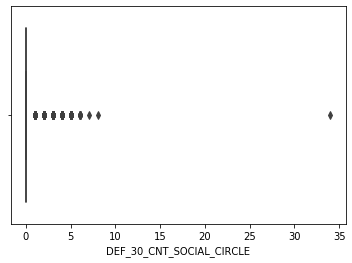

Missing values :  1021
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


In [46]:
# let us look at column DEF_30_CNT_SOCIAL_CIRCLE
analyze_data(app_data,"DEF_30_CNT_SOCIAL_CIRCLE")

In [47]:
# The column DEF_30_CNT_SOCIAL_CIRCLE is described as "How many observation of client's social surroundings defaulted on 30 DPD (days past due)"
# This column needs below corrections
# a) Data type is floating value. This must be changed to integer.
# b) There are 1021 missing values in column. We can't directly convert NAN to integer. 
#    Since, NAN data type is float. We also need to impute this missing value.
#    By looking at data definition, it may be safe to assume that a missing value can be imputed by zero meaning no record of observations in social surroundings.
app_data.DEF_30_CNT_SOCIAL_CIRCLE=app_data.DEF_30_CNT_SOCIAL_CIRCLE.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)

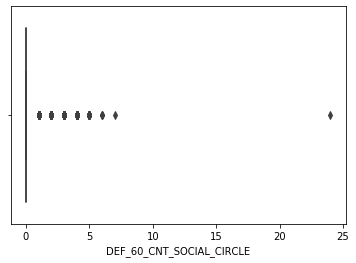

Missing values :  1021
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [48]:
# We can apply similar principle to column DEF_60_CNT_SOCIAL_CIRCLE as well.
analyze_data(app_data,"DEF_60_CNT_SOCIAL_CIRCLE")

In [49]:
#imputing null values with 0
app_data.DEF_60_CNT_SOCIAL_CIRCLE=app_data.DEF_60_CNT_SOCIAL_CIRCLE.apply(lambda x:int(abs(x)) if (not np.isnan(x)) else 0)

### Step 3.f : Binning of continous variables

First let us identify continuous variables in data frame. Continuous variables are stored as floating values.

In [50]:
#grouping the columns based on data types
app_data.columns.to_series().groupby(app_data.dtypes).groups

{dtype('int64'): Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
        'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
        'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
        'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12'

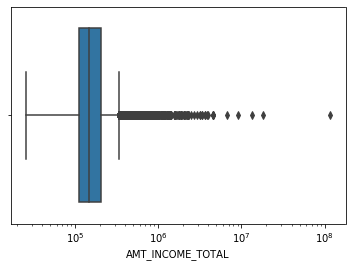

Missing values :  0
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [51]:
# First let us look at AMT_INCOME_TOTAL
analyze_data(app_data,"AMT_INCOME_TOTAL","log")

In [52]:
# As we see from plot, there are several outliers. To handle these outliers, one way would be to bin the data in to categories.

# Let us look at where 90% of income values are
ninety_per_val=np.quantile(app_data.AMT_INCOME_TOTAL,0.9)

In [53]:
# Since the mean value is 1,68,797. Let us consider bin size to be at least quarter of mean which comes to around 42000, 
# rounding off to nearest value which is 40000.
bins = [x for x in np.arange(0,ninety_per_val,40000,dtype="int")]+[max(app_data.AMT_INCOME_TOTAL)]
bin_lbls = [str(bins[i])+" - "+str(bins[i+1]) for i in range(0,len(bins)-2)] + [str(bins[-2])+" and above"]
app_data["AMT_INCOME_TOTAL_RNG"] = pd.cut(app_data.AMT_INCOME_TOTAL,bins=bins,labels=bin_lbls)
app_data["AMT_INCOME_TOTAL_RNG"].value_counts(sort=False)

0 - 40000             963
40000 - 80000       26400
80000 - 120000      75974
120000 - 160000     79790
160000 - 200000     36469
200000 - 240000     42319
240000 and above    45596
Name: AMT_INCOME_TOTAL_RNG, dtype: int64

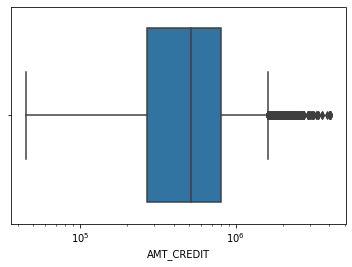

Missing values :  0
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


In [54]:
# Apply similar logic to CREDIT Amount and ANNUITY amount.
analyze_data(app_data,"AMT_CREDIT","log")

In [55]:
# As we see from plot, there are several outliers. To handle these outliers, one way would be to bin the data in to categories.

# Let us look at where 90% of income values are
ninety_per_val=np.quantile(app_data.AMT_CREDIT,0.9)
ninety_per_val

1133748.0

In [56]:
# Since the mean value is 5,99,026. Let us consider bin size to be at least quarter of mean which comes to around 1,50,000, 
bins = [x for x in np.arange(0,ninety_per_val,150000,dtype="int")]+[max(app_data.AMT_CREDIT)]
bin_lbls = [str(bins[i])+" - "+str(bins[i+1]) for i in range(0,len(bins)-2)] + [str(bins[-2])+" and above"]
app_data["AMT_CREDIT_RANGE"] = pd.cut(app_data.AMT_CREDIT,bins=bins,labels=bin_lbls)
app_data.AMT_CREDIT_RANGE.value_counts(sort=False)

0 - 150000           18159
150000 - 300000      72798
300000 - 450000      44577
450000 - 600000      48031
600000 - 750000      30862
750000 - 900000      34172
900000 - 1050000     15939
1050000 and above    42973
Name: AMT_CREDIT_RANGE, dtype: int64

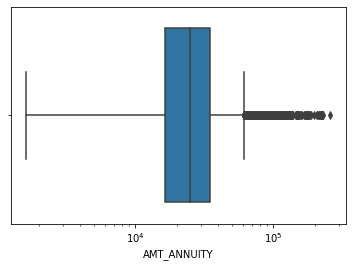

Missing values :  12
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [57]:
# Let us look at Annuity amount
analyze_data(app_data,"AMT_ANNUITY","log")

In [58]:
# As we see from plot, there are several outliers and missing values. To handle these outliers, one way would be to bin the data in to categories.
# For now, we will leave this column as it is, since it is hard to impute the column with an appropriate value.

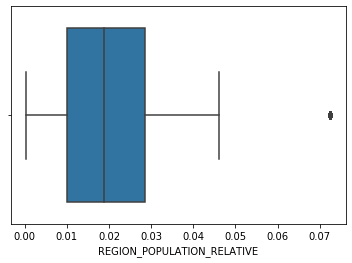

Missing values :  0
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


In [59]:
# Let us look at REGION_POPULATION_RELATIVE.
analyze_data(app_data,"REGION_POPULATION_RELATIVE")

In [60]:
# This column REGION_POPULATION_RELATIVE is described as "Normalized population of region where client lives (higher number means the client lives in more populated region)".
# This column is also normalized with no missing values.
# Since, the high value represents dense area, low value represents sparse area, We can bin in to two ategories.
# From the plot, the outlier is clearly seen.
# We can divide in to following bins
# 0 to mean 1st Quartile - Sparse
# 1st to 3rd Quartile - Normal
# Above 3rd Quartile - Dense
bins  = [0]+ list(app_data.REGION_POPULATION_RELATIVE.quantile([0.25,0.75,1]).to_numpy())
bin_lbls = ['Sparse','Normal','Dense']
app_data.REGION_POPULATION_RELATIVE = pd.cut(app_data.REGION_POPULATION_RELATIVE,bins,labels=bin_lbls)
app_data.REGION_POPULATION_RELATIVE.value_counts(sort=False)

Sparse     78124
Normal    161005
Dense      68382
Name: REGION_POPULATION_RELATIVE, dtype: int64

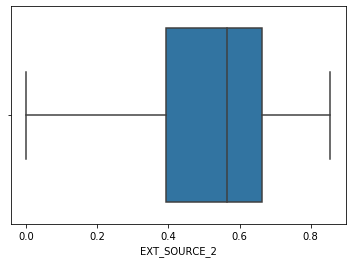

Missing values :  660
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


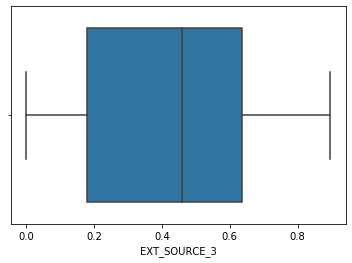

Missing values :  0
count    307511.000000
mean          0.409575
std           0.268177
min           0.000000
25%           0.178760
50%           0.459690
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


In [61]:
# Let us now look at columns EXT_SOURCE_2, EXT_SOURCE_3.
# These columns represent a normalized score from external data source.
# Let us look at each column
analyze_data(app_data,"EXT_SOURCE_2")
analyze_data(app_data,"EXT_SOURCE_3")

In [62]:
# EXT_SOURCE_2 is left as it is as it is hard to derive reasonable value to impute.
# Turning to EXT_SOURCE_3, it can be categorized as "Low", "Medium", "High"
bins  = [0]+ list(app_data.EXT_SOURCE_3.quantile([0.25,0.75,1]).to_numpy())
bin_lbls=["Low","Medium","High"]
app_data.EXT_SOURCE_3 = pd.cut(app_data.EXT_SOURCE_3,bins,labels=bin_lbls)
app_data.EXT_SOURCE_3.value_counts(sort=False)

Low        16011
Medium    154452
High       76083
Name: EXT_SOURCE_3, dtype: int64

## Step 4. Data Analysis - Univariate and BiVariate
### Step 4.a : Check the imbalance percentage

In [63]:
# Checking the imbalance percentage
tg_percentages=100*app_data.TARGET.value_counts()/len(app_data)
print("Customers with no difficulty in payments : ","{:.1f}".format(tg_percentages[0]), "%")
print("Customers with difficulty in payments : ","{:.1f}".format(tg_percentages[1]), "%")

Customers with no difficulty in payments :  91.9 %
Customers with difficulty in payments :  8.1 %


### Step 4.b : Divide the data set in to 2 sets i.e TARGET =1 and TARGET =0

In [64]:
# Dividing the dataset into two datasets of  target=1(client with payment difficulties) and target=0(all other)
app_data_w_difficulty=app_data[app_data['TARGET']==1]
app_data_wo_difficulty=app_data[app_data['TARGET']==0]

In [65]:
#verifying the data set 
app_data_w_difficulty.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RNG,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,1,200000 - 240000,300000 - 450000
26,100031,1,Cash loans,F,0,1,0,112500.0,979992.0,27076.5,...,0,0,0,0,0,0,2,2,80000 - 120000,900000 - 1050000
40,100047,1,Cash loans,M,0,1,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0,2,0,4,200000 - 240000,1050000 and above
42,100049,1,Cash loans,F,0,0,0,135000.0,288873.0,16258.5,...,0,0,0,0,0,0,0,2,120000 - 160000,150000 - 300000
81,100096,1,Cash loans,F,0,1,0,81000.0,252000.0,14593.5,...,0,0,0,0,0,0,0,0,80000 - 120000,150000 - 300000


In [66]:
#verifying the data set 
app_data_wo_difficulty.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_RNG,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,240000 and above,1050000 and above
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,40000 - 80000,0 - 150000
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,120000 - 160000,300000 - 450000
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,120000 - 160000,450000 - 600000
5,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0,0,1,1,80000 - 120000,450000 - 600000


### 4.c Univariate Analysis on categorical variables

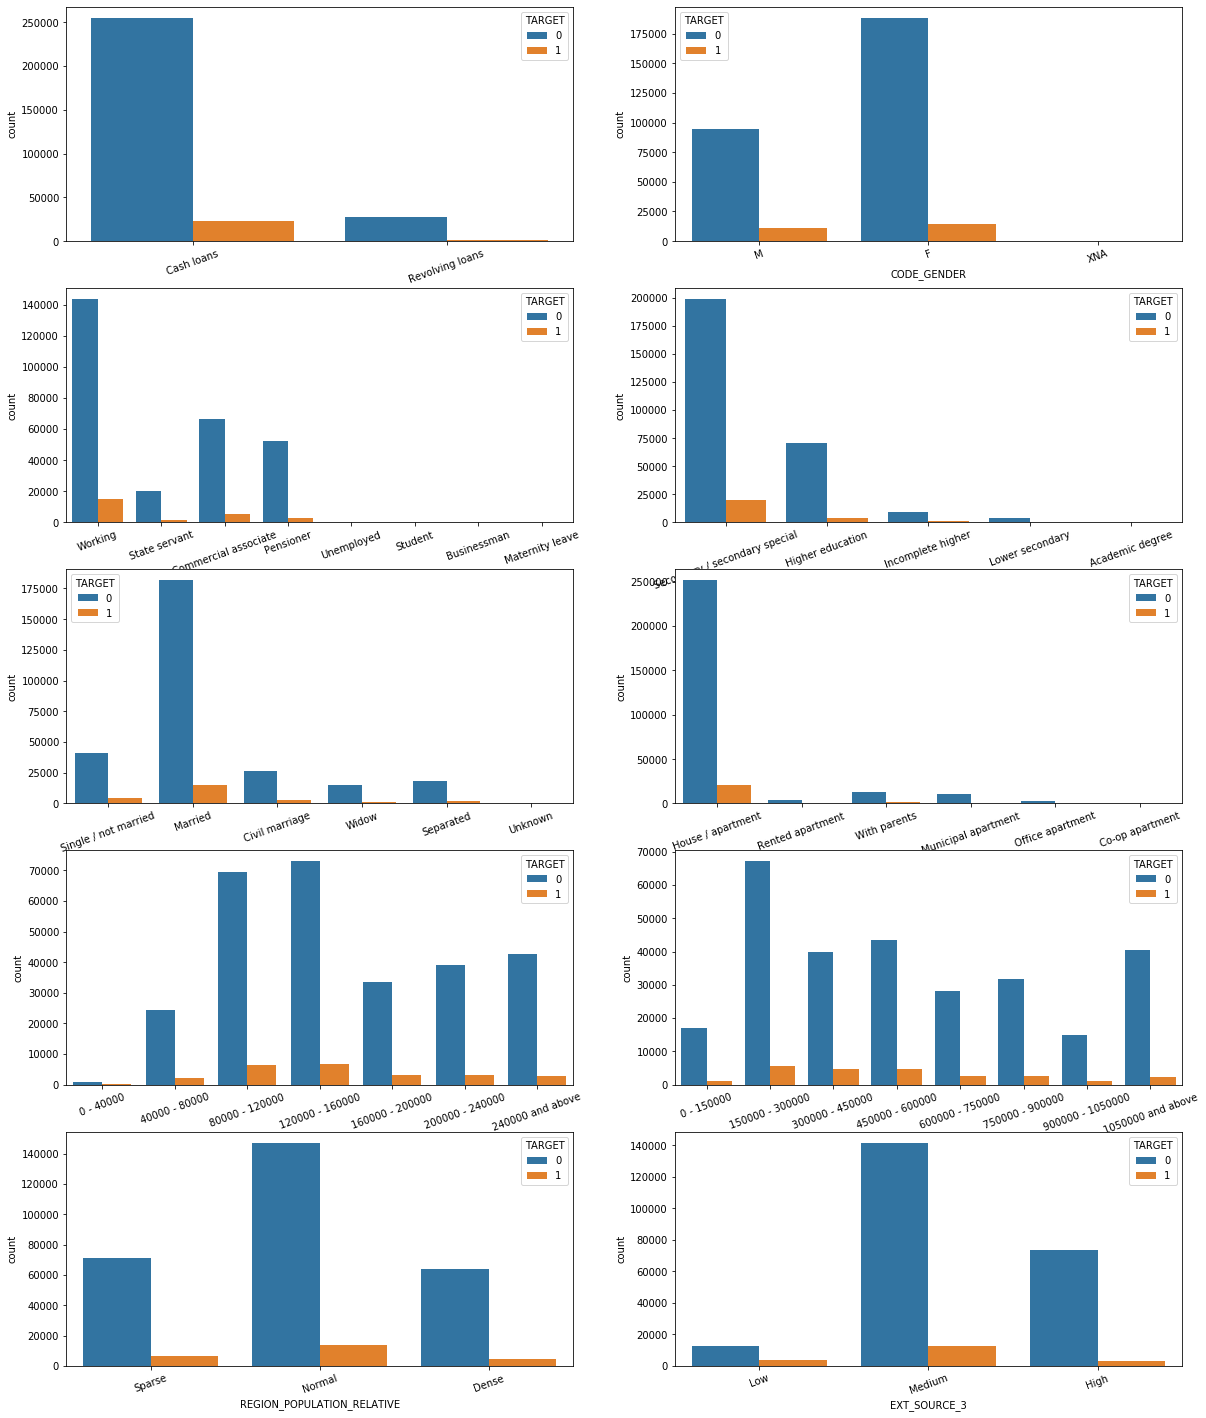

In [67]:
# Univariate analaysis on the categorical variables
# Below are categoritcal variables we have identified till now
#  NAME_CONTRACT_TYPE
#  CODE_GENDER
#  NAME_INCOME_TYPE
#  NAME_EDUCATION_TYPE
#  NAME_FAMILY_STATUS
#  NAME_HOUSING_TYPE
#  AMT_INCOME_RANGE
#  AMT_CREDIT_RANGE
#  EXT_SOURCE_3
#  REGION_POPULATION_RELATIVE
cat_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AMT_INCOME_TOTAL_RNG','AMT_CREDIT_RANGE','REGION_POPULATION_RELATIVE','EXT_SOURCE_3']
plt.figure(figsize=(20,25))
for num,feature in enumerate(cat_features):
    plt.subplot(len(cat_features)/2,2,num+1)
    sns.countplot(x=feature,hue='TARGET',data=app_data)
    plt.xticks(rotation=20)

**Based on visual inspection of plots, below class of customers have more difficulties with payments**
* Cash loans
* Female customers
* Working professionals
* Customers with SSC Education qualification
* Married customers
* Customers living in "House/apartment"
* Income range of 80000 to 160000
* Credit range of 150000 to 600000
* Customers in cities with nominal population density
* Customer whose rating is given as "Medium" by external source 3

### Step 4.d : Correlation for numerical columns for both the cases

In [68]:
# Correlation for dataset with  difficulty in payment (Target = 1)
def get_cols_corr(df):
    c = df.corr()
    c = c.where(np.triu(np.ones(c.shape),k=1).astype(np.bool))
    c = c.unstack().reset_index()
    c.columns=['Column1','Column2','Correlation']
    c.dropna(subset = ['Correlation'],inplace=True)
    c['Correlation']= round(c['Correlation'],2)
    #since we see Correlation as an aboslute value , we are converting it into abosolute value
    c['Correlation']=c['Correlation'].abs()
    c.sort_values(by='Correlation',ascending = False,inplace=True)
    return(c)
corr_tgt_1 = get_cols_corr(app_data_w_difficulty)
corr_tgt_1.head(10)

,Column1,Column2,Correlation
864,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
494,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1301,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
1163,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
1549,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
1735,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
433,AMT_ANNUITY,AMT_CREDIT,0.75
495,AMT_GOODS_PRICE,AMT_ANNUITY,0.75


In [69]:
# Correlation for dataset with no difficulty in payment (Target = 0)
corr_tgt_0 = get_cols_corr(app_data_wo_difficulty)
corr_tgt_0.head(10)

,Column1,Column2,Correlation
864,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
494,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1301,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1163,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1549,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1735,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
495,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
433,AMT_ANNUITY,AMT_CREDIT,0.77


### Step 4.e : Check for columns with high correlation from both data sets.

In [70]:
# We can see that column names are matching for top 5 although correlation values do not match.
corr_tgt_0[0:5]==corr_tgt_1[0:5]

,Column1,Column2,Correlation
864,True,True,True
1982,True,True,True
494,True,True,False
1301,True,True,False
1163,True,True,False


### Step 4.f : Univariate for numerical variables 

In [71]:
#checking the data set information
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null int64
FLAG_OWN_REALTY                307511 non-null int64
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE

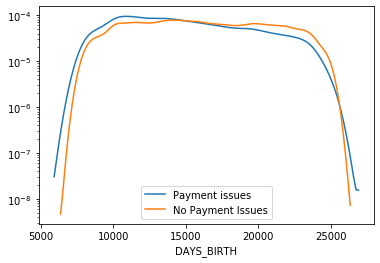

In [72]:
# univariate analaysis on DAYS_BIRTH (or age of customer)
def univariate_plot(df1,df2,col,lbl1,lbl2):
    plt.yscale('log')
    sns.distplot(df1[col],hist=False,label=lbl1)
    sns.distplot(df2[col],hist=False,label=lbl2)
    plt.legend()
    plt.show()
univariate_plot(app_data_w_difficulty,app_data_wo_difficulty,'DAYS_BIRTH','Payment issues','No Payment Issues')

* From plot, we can see that young to middle aged people (<15000 days = 41 years), customers usually tend to have more difficulties than people in above middle aged people.
* While the trend again reverses for pensioners (~69 years)

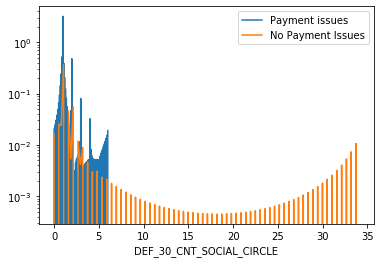

In [73]:
# univariate analaysis on DEF_30_CNT_SOCIAL_CIRCLE
univariate_plot(app_data_w_difficulty,app_data_wo_difficulty,'DEF_30_CNT_SOCIAL_CIRCLE','Payment issues','No Payment Issues')

* It is not possible to draw any conclusion from this plot.

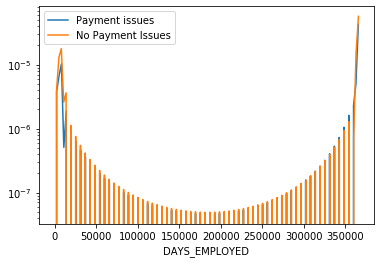

In [74]:
# univariate analaysis on DAYS_EMPLOYED
univariate_plot(app_data_w_difficulty,app_data_wo_difficulty,'DAYS_EMPLOYED','Payment issues','No Payment Issues')

* The plot suggests for people whose duration of employment is low, there are more issues with payment difficulties.

### Step 4.g : Bivariate analaysis for numerical variables

##### Education type, Credit amount vs Target

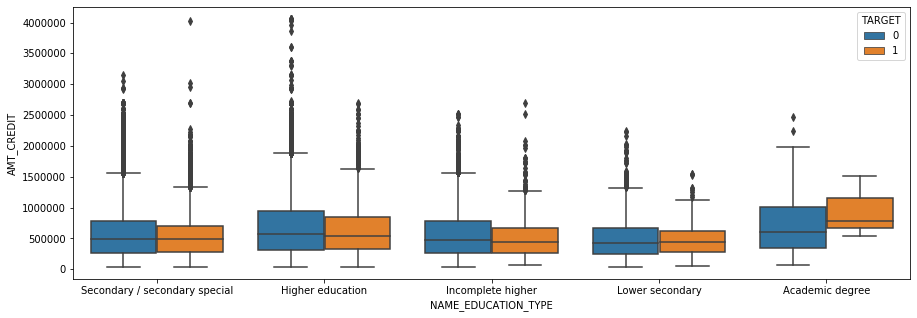

In [75]:
# Box plotting for Credit amount
plt.figure(figsize=(15,5))
sns.boxplot(data=app_data,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='TARGET')

* From above plot we can see that on average, people with Academic degree have taken high credit and as credit amount increases, the risk of defaulting (TARGET=1) is also higher.

##### Credit, Income vs Target

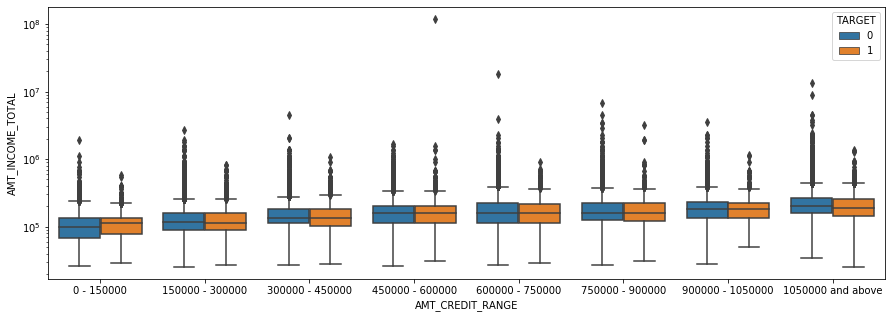

In [76]:
# Box plotting for Income total amount
plt.figure(figsize=(15,5))
sns.boxplot(data=app_data,x='AMT_CREDIT_RANGE',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.yscale('log')

* For people with low income range (0 to 1.5Lakh), on average there are high payment difficulties.
* For people with high income range (10.5Lakh and above), on average there are less payment difficulties.

## Step 5: Previous Application Data

In [77]:
# Reading the dataset of previous application
prev_app_data=pd.read_csv("previous_application.csv")

In [78]:
#checking the data frame info
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [79]:
# Get null counts in each column and sort them by columns having highest percentage of null values.
null_percentage=(prev_app_data.isnull().sum()*100/prev_app_data.shape[0]).to_frame('Null_Percentage')
null_percentage.sort_values(by='Null_Percentage',ascending=False,inplace=True)
# Print only columns where there are some nulls.
# Also adjust the maximum rows displayed temporarily and reset after all columns are displayed.
def_rows = pd.options.display.max_rows
pd.options.display.max_rows = 100
# Let us get list of columns where Null value percentages are above 40%.
cols_to_remove = null_percentage[null_percentage.Null_Percentage>40].index
print(null_percentage[null_percentage.Null_Percentage>40])
pd.options.display.max_rows = def_rows

                           Null_Percentage
RATE_INTEREST_PRIVILEGED         99.643698
RATE_INTEREST_PRIMARY            99.643698
AMT_DOWN_PAYMENT                 53.636480
RATE_DOWN_PAYMENT                53.636480
NAME_TYPE_SUITE                  49.119754
NFLAG_INSURED_ON_APPROVAL        40.298129
DAYS_TERMINATION                 40.298129
DAYS_LAST_DUE                    40.298129
DAYS_LAST_DUE_1ST_VERSION        40.298129
DAYS_FIRST_DUE                   40.298129
DAYS_FIRST_DRAWING               40.298129


In [80]:
# Chosing threshold as 40% to remove
prev_app_data.drop(cols_to_remove,axis=1,inplace=True)
# Recheck data infomration.
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

### Step 5.a : Merging application and previous

In [81]:
# Now merging the Application dataset with previous appliaction dataset
merge_data=pd.merge(left=app_data,right=prev_app_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [82]:
#checking the merge data frame info
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 100 columns):
SK_ID_CURR                     1413701 non-null int64
TARGET                         1413701 non-null int64
NAME_CONTRACT_TYPE_            1413701 non-null object
CODE_GENDER                    1413701 non-null object
FLAG_OWN_CAR                   1413701 non-null int64
FLAG_OWN_REALTY                1413701 non-null int64
CNT_CHILDREN                   1413701 non-null int64
AMT_INCOME_TOTAL               1413701 non-null float64
AMT_CREDIT_                    1413701 non-null float64
AMT_ANNUITY_                   1413608 non-null float64
AMT_GOODS_PRICE_               1412493 non-null float64
NAME_TYPE_SUITE                1410175 non-null object
NAME_INCOME_TYPE               1413701 non-null object
NAME_EDUCATION_TYPE            1413701 non-null object
NAME_FAMILY_STATUS             1413701 non-null object
NAME_HOUSING_TYPE              1413701 non-null object
REGION_

In [83]:
# Renaming the column names after merging
# In original data, some columns will be repeated which are named with "_" at end.
merge_data = merge_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_GOODS_PRICE_':'AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START_':'WEEKDAY_APPR_PROCESS_START'}, axis=1)

In [84]:
#checking the merge data info again after applying changes
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 100 columns):
SK_ID_CURR                     1413701 non-null int64
TARGET                         1413701 non-null int64
NAME_CONTRACT_TYPE             1413701 non-null object
CODE_GENDER                    1413701 non-null object
FLAG_OWN_CAR                   1413701 non-null int64
FLAG_OWN_REALTY                1413701 non-null int64
CNT_CHILDREN                   1413701 non-null int64
AMT_INCOME_TOTAL               1413701 non-null float64
AMT_CREDIT                     1413701 non-null float64
AMT_ANNUITY_                   1413608 non-null float64
AMT_GOODS_PRICE                1412493 non-null float64
NAME_TYPE_SUITE                1410175 non-null object
NAME_INCOME_TYPE               1413701 non-null object
NAME_EDUCATION_TYPE            1413701 non-null object
NAME_FAMILY_STATUS             1413701 non-null object
NAME_HOUSING_TYPE              1413701 non-null object
REGION_

#### 6.b Univariate Analysis

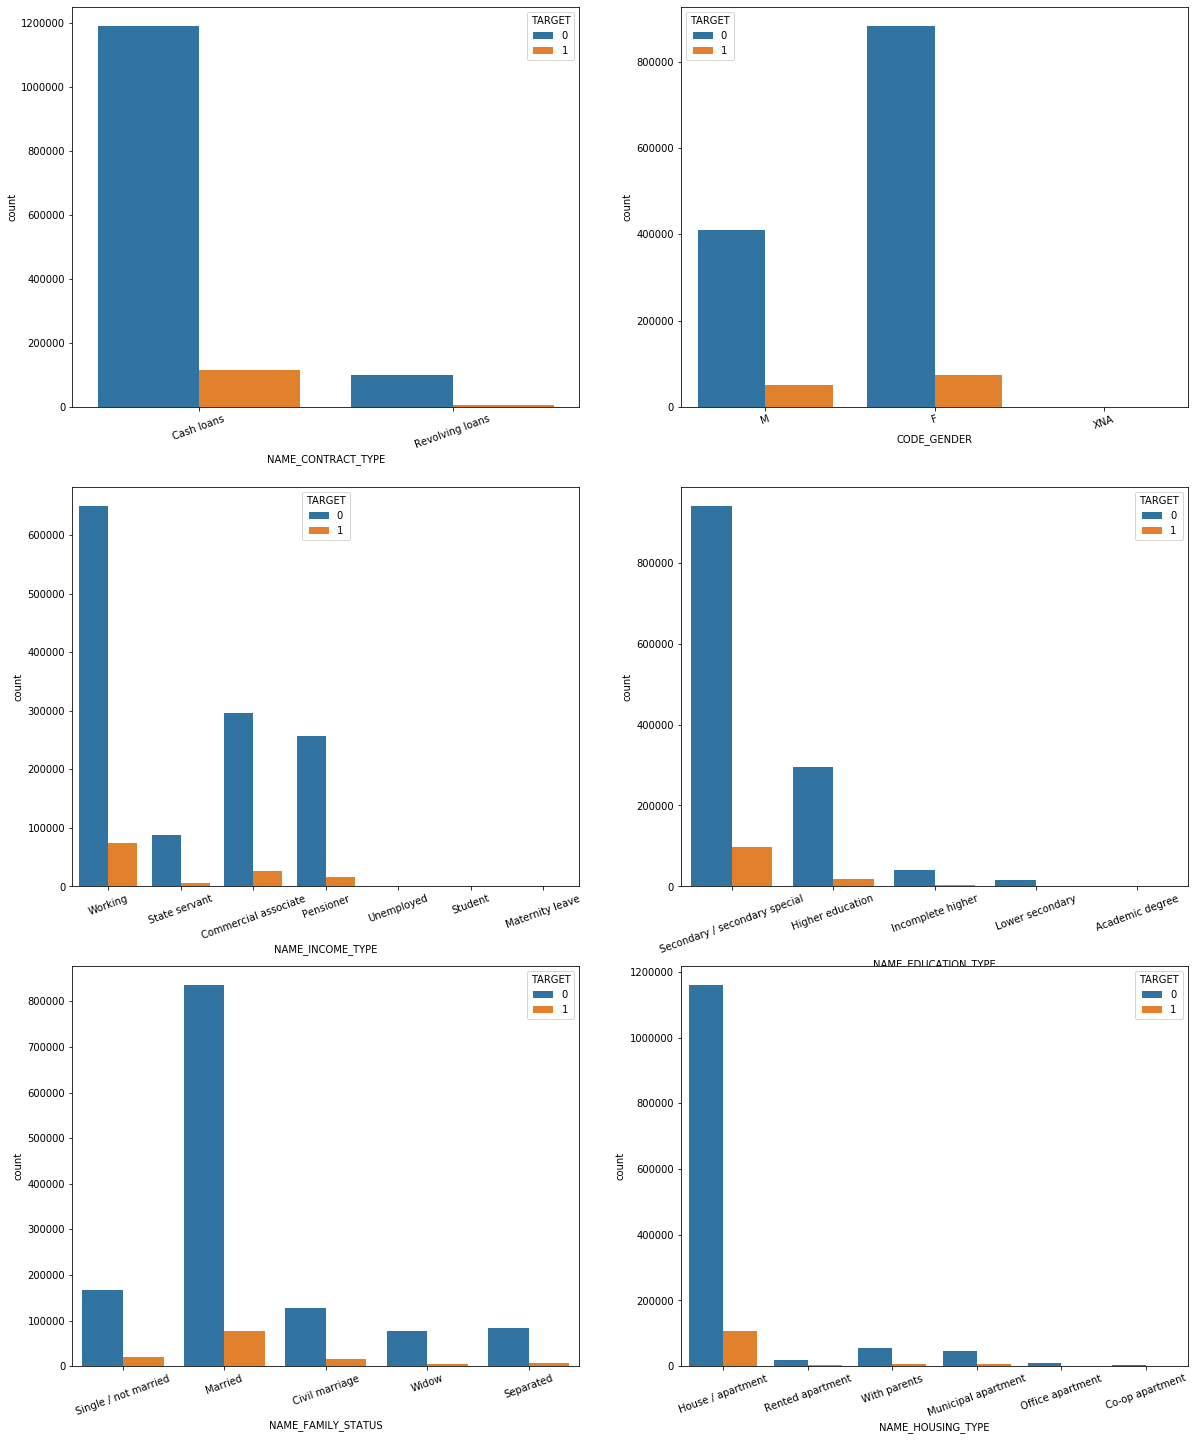

In [85]:
#univariate analysis on categorical columns
cat_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
plt.figure(figsize=(20,25))
for num,feature in enumerate(cat_features):
    plt.subplot(len(cat_features)/2,2,num+1)
    sns.countplot(x=feature,hue='TARGET',data=merge_data)
    plt.xticks(rotation=20)
plt.show()

* As we can see the conclusions we made on app_data still holds good with merged data set also.

#### 6.c Bivariate analysis

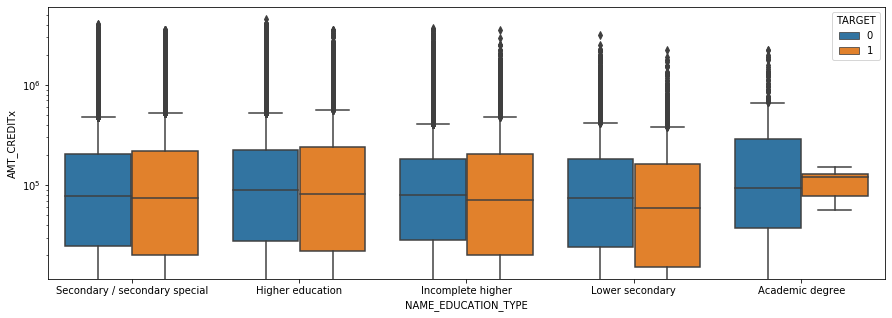

In [86]:
#Bivariate analysis on categorical columns
plt.figure(figsize=(15,5))
sns.boxplot(data=merge_data,x='NAME_EDUCATION_TYPE',y='AMT_CREDITx',hue='TARGET')
plt.yscale('log')
plt.show()

* Looking at history, people with other than "Academic degree" consistently had issue with payments.

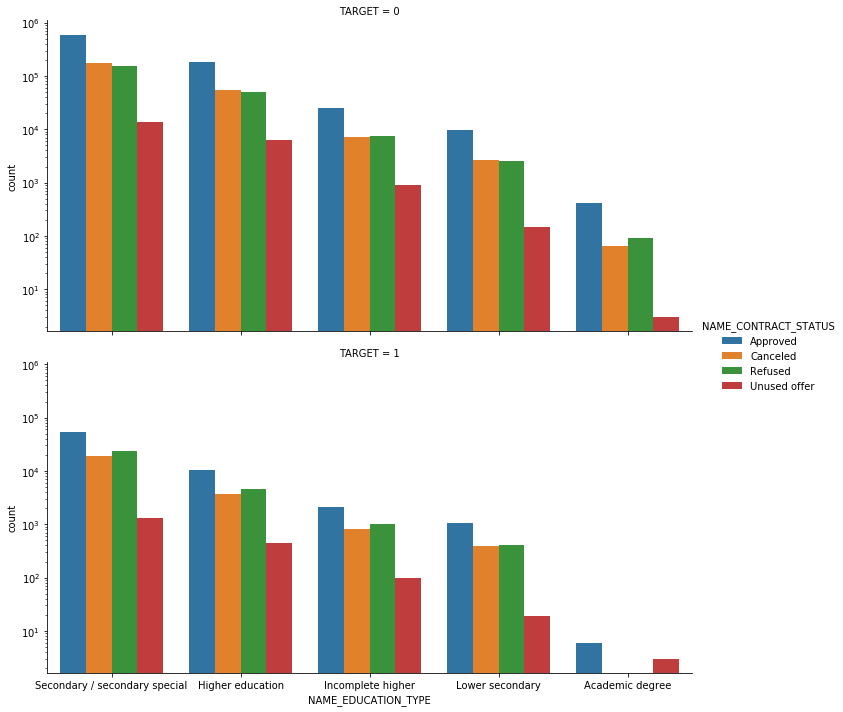

In [87]:
#Bivariate analysis on categorical columns
sns.catplot(data=merge_data,x='NAME_EDUCATION_TYPE',col='TARGET',hue='NAME_CONTRACT_STATUS',kind='count',col_wrap=1,height=5,aspect=2)
plt.yscale('log')
plt.show()

* Consistently people with secondary education are largest customers in all categories.
* When there are payment difficulties, people with academic degree either have approved loan or unused offer.

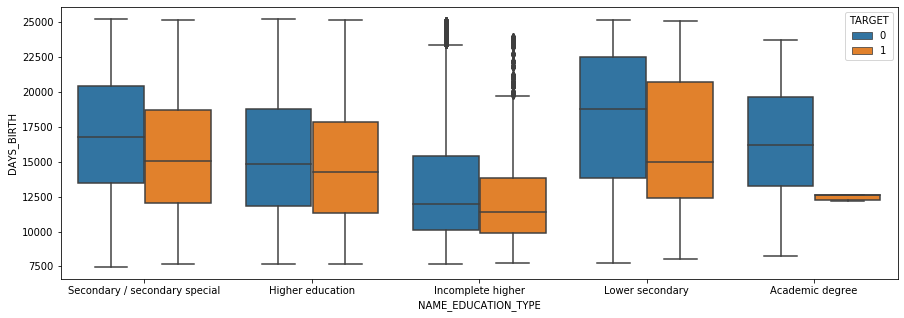

In [88]:
#Bivariate analysis on categorical columns
plt.figure(figsize=(15,5))
sns.boxplot(data=merge_data,x='NAME_EDUCATION_TYPE',y='DAYS_BIRTH',hue='TARGET')
plt.show()

* In general, people at younger age tend to have more payment difficulties compared to people with older age.
* When we look at people with "academic degree", people at young age have payment difficulties isolating the age range. We can safely conclude that for people with "academic degree" , the young age is where more defaults happen.
* The means of defaulter's age across every education type is consistently lower compared to people who do not default.

#### 7. Conclusions
* Female customers consistently have payment difficulties
* Customers with Secondary / Secondary special education have high payment difficulties
* Cash loans have high payment difficulties, however there is large quantum of cash loans as well when compared to revolving loans.
* People living in "House/apartment" have high payment difficulties. But this is just a **casuation** since people have to live somewhere.
* "Married" people have high payment difficulties.
* "Young people" with Academic degree often tend to default